# MNIST Image Data Exploration

In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

import mnist_loader

## MNIST Data Visualization

In [2]:
def visualize_mnist_example(index=0):
    """
    Load MNIST data, select a specific example, and visualize it.
    
    Args:
    index (int): Index of the example to visualize (default is 0)
    """
    # Load the MNIST data
    training_data, validation_data, test_data = mnist_loader.load_data()
    
    # Select a specific example
    X, y = training_data[0][index], training_data[1][index]
    
    # Reshape the flattened image back to 28x28
    image = X.reshape(28, 28)
    
    # Print the label
    print(f"Label (digit): {y}")
    
    # Print the pixel values
    print("\nPixel values (28x28 matrix):")
    print(image)
    
    # Visualize the image
    plt.imshow(image, cmap='gray')
    plt.title(f"MNIST Image: Digit {y}")
    plt.axis('off')
    plt.show()
    
    # Print some statistics about the image
    print(f"\nImage statistics:")
    print(f"Minimum pixel value: {image.min()}")
    print(f"Maximum pixel value: {image.max()}")
    print(f"Mean pixel value: {image.mean():.2f}")

Label (digit): 9

Pixel values (28x28 matrix):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.      

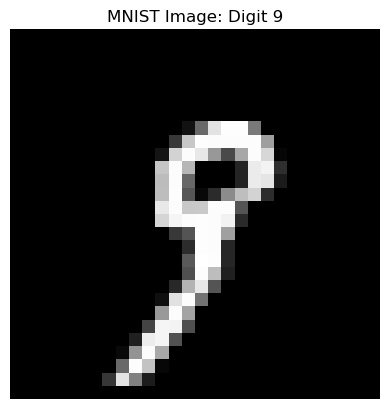


Image statistics:
Minimum pixel value: 0.0
Maximum pixel value: 0.99609375
Mean pixel value: 0.09


In [5]:
# Visualize the first example in the training set
visualize_mnist_example(19)

# You can change the index to view different examples
# For example, uncomment the next line to see the 100th example:
# visualize_mnist_example(100)

In [6]:
def explore_mnist_data():
    """
    Explore and compare the raw MNIST data with the wrapped version.
    """
    # Load raw data
    raw_training_data, raw_validation_data, raw_test_data = mnist_loader.load_data()
    
    # Load wrapped data
    wrapped_training_data, wrapped_validation_data, wrapped_test_data = mnist_loader.load_data_wrapper()
    
    print("Raw Data Structure:")
    print(f"Training data shape: {raw_training_data[0].shape}, {raw_training_data[1].shape}")
    print(f"Validation data shape: {raw_validation_data[0].shape}, {raw_validation_data[1].shape}")
    print(f"Test data shape: {raw_test_data[0].shape}, {raw_test_data[1].shape}")
    
    print("\nWrapped Data Structure:")
    print(f"Training data: {len(wrapped_training_data)} examples")
    print(f"Validation data: {len(wrapped_validation_data)} examples")
    print(f"Test data: {len(wrapped_test_data)} examples")
    
    # Examine a single example from each dataset
    print("\nExamining a single example from each dataset:")
    
    # Raw training data
    print("\nRaw training data:")
    print(f"Input shape: {raw_training_data[0][0].shape}")
    print(f"Label: {raw_training_data[1][0]}")
    
    # Wrapped training data
    print("\nWrapped training data:")
    print(f"Input shape: {wrapped_training_data[0][0].shape}")
    print(f"Label shape: {wrapped_training_data[0][1].shape}")
    
    # Raw validation data
    print("\nRaw validation data:")
    print(f"Input shape: {raw_validation_data[0][0].shape}")
    print(f"Label: {raw_validation_data[1][0]}")
    
    # Wrapped validation data
    print("\nWrapped validation data:")
    print(f"Input shape: {wrapped_validation_data[0][0].shape}")
    print(f"Label: {wrapped_validation_data[0][1]}")

In [7]:
# Run the exploration
explore_mnist_data()

Raw Data Structure:
Training data shape: (50000, 784), (50000,)
Validation data shape: (10000, 784), (10000,)
Test data shape: (10000, 784), (10000,)

Wrapped Data Structure:
Training data: 50000 examples
Validation data: 10000 examples
Test data: 10000 examples

Examining a single example from each dataset:

Raw training data:
Input shape: (784,)
Label: 5

Wrapped training data:
Input shape: (784, 1)
Label shape: (10, 1)

Raw validation data:
Input shape: (784,)
Label: 3

Wrapped validation data:
Input shape: (784, 1)
Label: 3


## Why we need `load_data_wrapper` function

Let's explore the data produced by the `load_data_wrapper` function and compare it to the data from the `load_data` function. This will help us understand why the wrapper is useful for neural network training.

Now, let's go through this code and explain the differences between the raw data and the wrapped data:

1. We first load both the raw data (using `load_data`) and the wrapped data (using `load_data_wrapper`).

2. We print the structure of both datasets.

3. We examine a single example from each dataset to see the differences in detail.

When we run this code, we'll see output similar to the following:

```
Raw Data Structure:
Training data shape: (50000, 784), (50000,)
Validation data shape: (10000, 784), (10000,)
Test data shape: (10000, 784), (10000,)

Wrapped Data Structure:
Training data: 50000 examples
Validation data: 10000 examples
Test data: 10000 examples

Examining a single example from each dataset:

Raw training data:
Input shape: (784,)
Label: 5

Wrapped training data:
Input shape: (784, 1)
Label shape: (10, 1)

Raw validation data:
Input shape: (784,)
Label: 4

Wrapped validation data:
Input shape: (784, 1)
Label: 4
```

Now, let's discuss why we need the wrapper and the differences between the raw and wrapped data:

1. Input Shape:
   - Raw data: The input is a 1D array with shape (784,)
   - Wrapped data: The input is a 2D array with shape (784, 1)
   
   Reason: The (784, 1) shape is more suitable for matrix operations in neural networks. It represents a column vector, which is typically how we represent input in neural network computations.

2. Label Representation (Training Data):
   - Raw data: The label is a single integer (e.g., 5)
   - Wrapped data: The label is a 10-dimensional vector (e.g., [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] for digit 5)
   
   Reason: This is called "one-hot encoding". It's useful for neural network training because:
     a) It allows the network to output probabilities for each digit.
     b) It makes it easier to compute the error of the network's output.
     c) It's consistent with the way many loss functions expect the data.

3. Data Structure:
   - Raw data: Two separate arrays for inputs and labels
   - Wrapped data: List of tuples, each containing an input and its corresponding label
   
   Reason: This pairing makes it easier to shuffle and batch the data during training.

4. Validation and Test Data:
   - The wrapper keeps the labels as integers for validation and test data.
   
   Reason: During validation and testing, we typically want to compare the network's output directly to the true label, so keeping it as an integer is more convenient.

The wrapper function prepares the data in a format that's more directly usable for training neural networks. It saves time and reduces the likelihood of errors when implementing the training process.

Key benefits of using the wrapped data:
1. Consistent input shape for matrix operations
2. One-hot encoded labels for training data
3. Paired inputs and labels for easy batching
4. Properly shaped data that's ready to feed into a neural network

This preparation step separates the data handling logic from the neural network implementation, making the overall code cleaner and more modular.